In [190]:
using Images, ImageDraw
using Colors
using FileIO
using Interpolations
using Plots

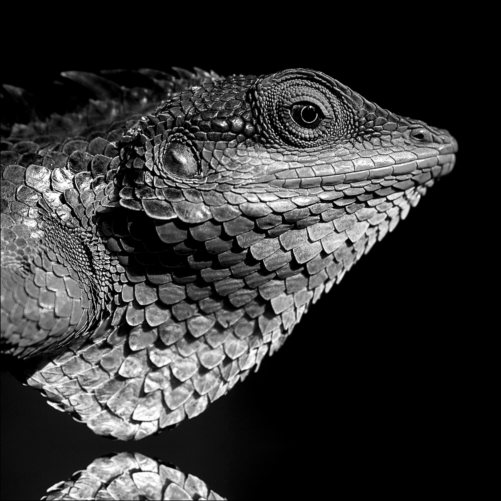

In [169]:
# specify the path to your local image file and load it:
img_path = "./images/input/lizard.jpg"
img = load(img_path)
img_grey = Gray{Float32}.(img)

# Hough transform most simple example
detecting one line:

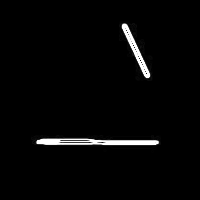

In [179]:
include("imageops.jl")
img = load("./images/input/geom2.jpg")
img = Gray{Float32}.(img)
img = sobel(img)

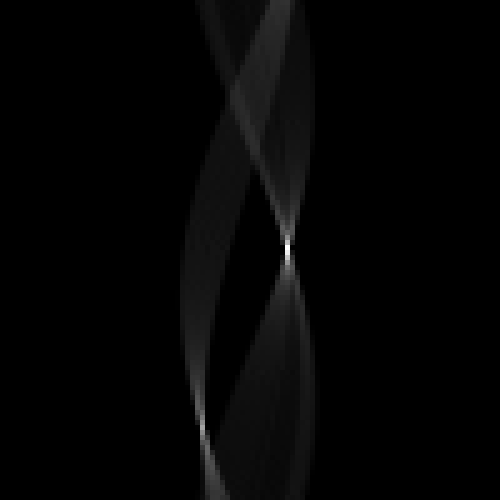

In [180]:
acc_matrix = hugh_transform_accumulator_matrix(img, (100,100))
imresize(Gray.(acc_matrix), (500, 500), method=Interpolations.Constant())

In [225]:
top_k_line_params = top_k_line_params_from_acc_matrix(acc_matrix, 10, size(img))

(phi, r, m, n) = (2.638937829015426, -50.911688126222145, 1.8189932472810648, -105.67991665274326)
(phi, r, m, n) = (1.5079644737231006, 45.2548341151483, -0.0629146672536499, 45.34431075449977)
(phi, r, m, n) = (2.73318560862312, -50.911688126222145, 2.3108636538824108, -128.19327340464415)
(phi, r, m, n) = (2.670353755551324, -50.911688126222145, 1.9626105055051501, -112.14262887754269)
(phi, r, m, n) = (1.6650441064025905, 45.2548341151483, 0.09452783117928212, 45.456571990665516)
(phi, r, m, n) = (2.701769682087222, -50.911688126222145, 2.125108173157201, -119.5729551314761)
(phi, r, m, n) = (1.5393804002589986, 45.2548341151483, -0.03142626604335125, 45.2771756681507)
(phi, r, m, n) = (1.6336281798666925, 45.2548341151483, 0.06291466725364979, 45.34431075449977)
(phi, r, m, n) = (1.6022122533307945, 45.2548341151483, 0.03142626604335113, 45.2771756681507)
(phi, r, m, n) = (1.5707963267948966, 45.2548341151483, -6.123233995736766e-17, 45.2548341151483)


10-element Vector{Tuple{Float64, Float64}}:
 (1.8189932472810648, -105.67991665274326)
 (-0.0629146672536499, 45.34431075449977)
 (2.3108636538824108, -128.19327340464415)
 (1.9626105055051501, -112.14262887754269)
 (0.09452783117928212, 45.456571990665516)
 (2.125108173157201, -119.5729551314761)
 (-0.03142626604335125, 45.2771756681507)
 (0.06291466725364979, 45.34431075449977)
 (0.03142626604335113, 45.2771756681507)
 (-6.123233995736766e-17, 45.2548341151483)

(x1, y1, x2, y2) = (0, -188, 200, 176)
(x1, y1, x2, y2) = (0, 151, 200, 139)
(x1, y1, x2, y2) = (0, -260, 200, 202)
(x1, y1, x2, y2) = (0, -209, 200, 184)
(x1, y1, x2, y2) = (0, 136, 200, 154)
(x1, y1, x2, y2) = (0, -233, 200, 192)
(x1, y1, x2, y2) = (0, 148, 200, 142)
(x1, y1, x2, y2) = (0, 139, 200, 151)
(x1, y1, x2, y2) = (0, 142, 200, 148)
(x1, y1, x2, y2) = (0, 145, 200, 145)


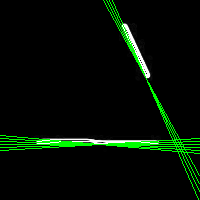

In [226]:
function plot_img_and_linear_functions(img, mn_list)
    img2 = RGB{Float32}.(copy(img))
    (h, w) = size(img)

    for (m, n) in mn_list
        x1 = -w ÷ 2
        x2 = w ÷ 2

        y1 = floor(Int, m * x1 + n)
        y2 = floor(Int, m * x2 + n)

        (x1, y1) = rel_pos_to_abs((x1, y1), (w, h))
        (x2, y2) = rel_pos_to_abs((x2, y2), (w, h))
        @show x1, y1, x2, y2
        draw!(img2, LineTwoPoints(Point(x1, y1), Point(x2, y2)), RGB{Float32}(0.0, 1.0, 0.0))
    end
    return img2
end

plot_img_and_linear_functions(img, top_k_line_params)

(phi, r, m, n) = (1.6022122533307945, 45.2548341151483, 0.03142626604335113, 45.2771756681507)
(phi, r, m, n) = (1.5707963267948966, 45.2548341151483, -6.123233995736766e-17, 45.2548341151483)
(x1, y1, x2, y2) = (0, 142, 200, 148)
(x1, y1, x2, y2) = (0, 145, 200, 145)


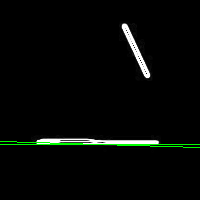

In [231]:
top_k_line_params = top_k_line_params_from_acc_matrix(acc_matrix, 2, size(img))
plot_img_and_linear_functions(img, top_k_line_params)

## detecting the edges of some shapes

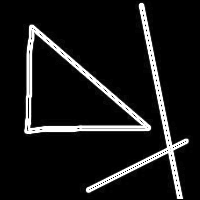

In [174]:
include("imageops.jl")
img = load("./images/input/geom.jpg")
img = Gray{Float32}.(img)
img = sobel(img)

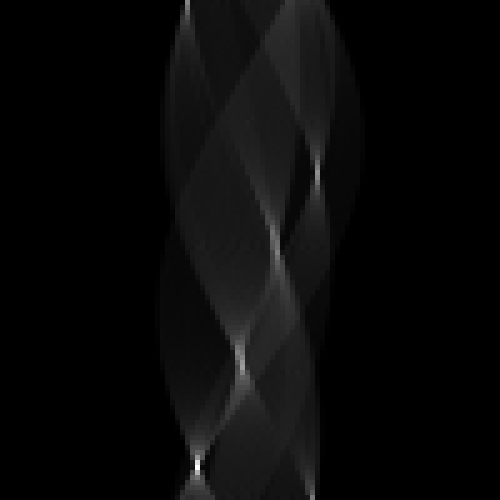

In [175]:
acc_matrix = hugh_transform_accumulator_matrix(img, (100,100))
imresize(Gray.(acc_matrix), (500, 500), method=Interpolations.Constant())

(phi, r, m, n) = (2.293362637120549, -5.6568541302830795, 0.8816185923631888, -7.54135535297448)
(phi, r, m, n) = (2.324778563656447, -5.6568541302830795, 0.9390625058174926, -7.760078990358104)
(phi, r, m, n) = (2.9845130209103035, -56.568542375714514, 6.3137515146750385, -361.6117609451761)
(phi, r, m, n) = (2.921681167838508, -56.568542375714514, 4.4737428292115595, -259.31833603262464)
(phi, r, m, n) = (2.9530970943744053, -56.568542375714514, 5.242183581113166, -301.8899856732246)


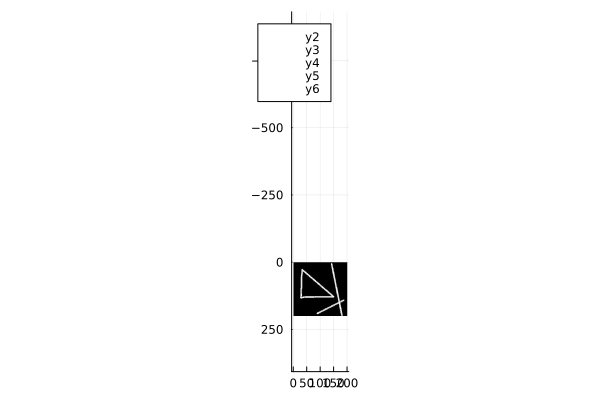

In [176]:
top_k_line_params = top_k_line_params_from_acc_matrix(acc_matrix, 5, size(sobel_img))
plot_img_and_linear_functions(img, top_k_line_params)